<a href="https://colab.research.google.com/github/marcosrbenso/leb_DataScience/blob/main/LEB0360/LEB0360_Hidrologia_Vaz%C3%B5es_ambientais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime as dt
import numpy as np
from matplotlib.ticker import FuncFormatter



In [24]:
url = "https://raw.githubusercontent.com/marcosrbenso/leb_DataScience/main/data/4D007_Cotas_Diarias_Serie_20251007_220749.csv"
url2 = "https://raw.githubusercontent.com/marcosrbenso/leb_DataScience/main/data/4D007_Vazoes_Medias_Diarias_Serie_20251007_222548.csv"

data = pd.read_csv(url,skiprows=12,delimiter=';',decimal=',')
data.head()

data_flow = pd.read_csv(url2,skiprows=12,delimiter=';',decimal=',')
data_flow.head()


,Mês/Ano,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,Vazão Mínima,Vazão Média,Vazão Máxima
0,06/1943,"74,618",73.764,"75,474","73,764","74,191","72,487","71,637","84,999",96.509,...,"69,522","71,213",70.790,69.100,"70,790","69,522",---,69.100,78.025,"97,405"
1,07/1943,"69,944",69.100,"69,944","68,258","60,765","64,908","64,076","62,416",63.245,...,"55,049","51,430",54.241,58.712,"59,122","55,454","56,266",51.430,60.930,"69,944"
2,08/1943,"51,830",50.234,"52,632","53,838","55,049","55,049","53,838","52,632",49.439,...,"49,439","51,830",59.532,64.908,"65,743","56,672","57,487",47.462,52.855,"65,743"
3,09/1943,"55,454",54.241,"55,049","55,049","52,632","42,779","45,110","43,553",44.720,...,"66,161","69,944",69.100,59.122,"63,660","61,590",---,42.779,55.177,"69,944"
4,10/1943,"62,003",57.079,"53,838","51,031","77,621","101,456","97,854","80,211",69.522,...,"77,621","75,474",74.191,152.660,"198,003","187,858","173,323",51.031,93.233,"198,003"


In [25]:
# Converte de formato largo para longo
data_flow_long = data_flow.melt(id_vars=['Mês/Ano'],
                      var_name='Dia',
                      value_name='Vazao')

# Garante que as colunas sejam strings sem espaços
data_flow_long['Mês/Ano'] = data_flow_long['Mês/Ano'].astype(str).str.strip()
data_flow_long['Dia'] = data_flow_long['Dia'].astype(str).str.strip()

# Cria a coluna de data completa (Dia/Mês/Ano)
data_flow_long['Data'] = pd.to_datetime(
    data_flow_long['Dia'] + '/' + data_flow_long['Mês/Ano'],
    format='%d/%m/%Y',
    errors='coerce'
)

# Remove linhas onde a conversão falhou
data_flow_long = data_flow_long.dropna(subset=['Data', 'Vazao'])
data_flow_long['Vazao'] = data_flow_long['Vazao'].fillna('-')


data_flow_long['Vazao'] = (
    data_flow_long['Vazao']
    .astype(str)
    .str.replace(',', '.', regex=False)  # vírgula → ponto
)

data_flow_long['Vazao'] = pd.to_numeric(data_flow_long['Vazao'], errors='coerce')

vazao = data_flow_long.groupby('Data')['Vazao'].mean().reset_index()
vazao.head()


,Data,Vazao
0,1943-06-01,74.618
1,1943-06-02,73.764
2,1943-06-03,75.474
3,1943-06-04,73.764
4,1943-06-05,74.191


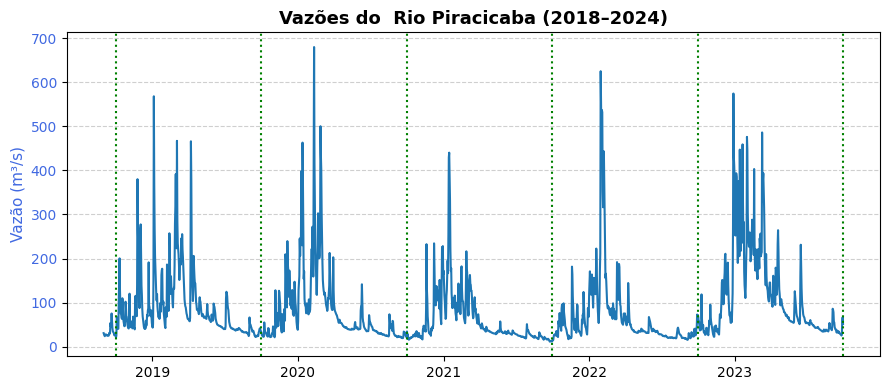

In [26]:
fig, ax1 = plt.subplots(figsize=(9,4))
vazao_novo = vazao[vazao['Data'] > dt.datetime(2018,8,31)]

ax1.plot(vazao_novo['Data'], vazao_novo['Vazao'])
ax1.set_ylabel("Vazão (m³/s)", color='royalblue', fontsize=11)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(axis='y', linestyle='--', alpha=0.6)

ax1.axvline(x=dt.datetime(2018,10,1), color='green', linestyle=':')
ax1.axvline(x=dt.datetime(2019,10,1), color='green', linestyle=':')
ax1.axvline(x=dt.datetime(2020,10,1), color='green', linestyle=':')
ax1.axvline(x=dt.datetime(2021,10,1), color='green', linestyle=':')
ax1.axvline(x=dt.datetime(2022,10,1), color='green', linestyle=':')
ax1.axvline(x=dt.datetime(2023,10,1), color='green', linestyle=':')

# --- Título e layout ---
plt.title("Vazões do  Rio Piracicaba (2018–2024)", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

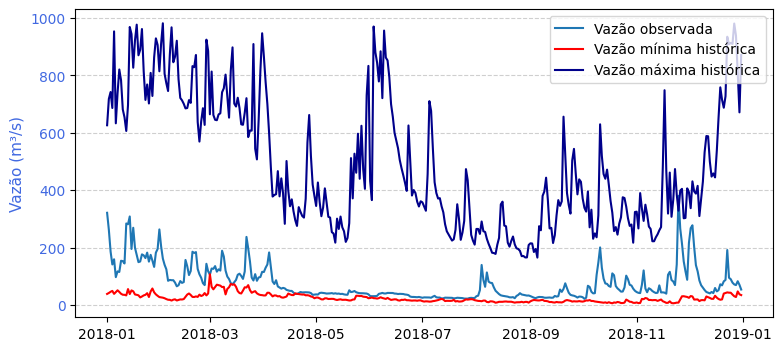

In [27]:
vazao['Ano_hidrologico'] = vazao['Data']-dt.timedelta(weeks = 3*4)
vazao['Ano_hidrologico'] = vazao['Ano_hidrologico'].dt.year
vazao['Ano'] = vazao['Data'].dt.year
vazao['Mes'] = vazao['Data'].dt.month
vazao['Dia'] = vazao['Data'].dt.day

vazao_min = vazao.groupby('Ano_hidrologico')['Vazao'].min().reset_index()
vazao_max = vazao.groupby('Ano_hidrologico')['Vazao'].max().reset_index()
vazao_max

vazao_min_mes = vazao.groupby(['Mes','Dia'])['Vazao'].min().reset_index()
vazao_max_mes = vazao.groupby(['Mes','Dia'])['Vazao'].max().reset_index()

fig, ax1 = plt.subplots(figsize=(9,4))
vazao_novo2 = vazao[vazao['Ano'] == 2018]
vazao_novo2

ax1.plot(vazao_novo2['Data'], vazao_novo2['Vazao'],label='Vazão observada')
ax1.plot(vazao_novo2['Data'],vazao_min_mes['Vazao'][0:len(vazao_novo2['Data'])],label = 'Vazão mínima histórica',color='red')
ax1.plot(vazao_novo2['Data'],vazao_max_mes['Vazao'][0:len(vazao_novo2['Data'])],label = 'Vazão máxima histórica',color='darkblue')
ax1.set_ylabel("Vazão (m³/s)", color='royalblue', fontsize=11)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.legend(loc='upper right') # Or 'best', 'lower left', etc.
ax1.grid(axis='y', linestyle='--', alpha=0.6)



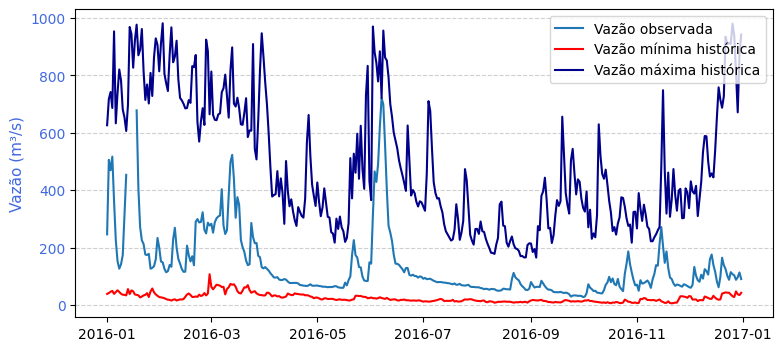

In [28]:

fig, ax1 = plt.subplots(figsize=(9,4))
vazao_novo2 = vazao[vazao['Ano'] == 2016]
vazao_novo2

ax1.plot(vazao_novo2['Data'], vazao_novo2['Vazao'],label='Vazão observada')
ax1.plot(vazao_novo2['Data'],vazao_min_mes['Vazao'],label = 'Vazão mínima histórica',color='red')
ax1.plot(vazao_novo2['Data'],vazao_max_mes['Vazao'],label = 'Vazão máxima histórica',color='darkblue')
ax1.set_ylabel("Vazão (m³/s)", color='royalblue', fontsize=11)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.legend(loc='upper right') # Or 'best', 'lower left', etc.
ax1.grid(axis='y', linestyle='--', alpha=0.6)

In [29]:
vazao_min = vazao_min.sort_values(by='Vazao', ascending=False).reset_index()
vazao_max = vazao_max.sort_values(by='Vazao', ascending=False).reset_index()

vazao_min.head(10)

,index,Ano_hidrologico,Vazao
0,33,1976,114.992
1,40,1983,86.841
2,39,1982,74.475
3,15,1958,65.869
4,4,1947,65.743
5,44,1987,64.465
6,34,1977,52.726
7,29,1972,50.746
8,14,1957,50.723
9,48,1991,49.746


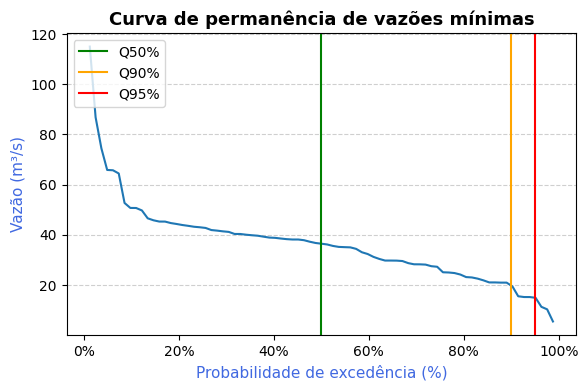

In [30]:
def myfunc(x, pos=0):
     return '%1.0f%%'%(100*x)

nyears = len(vazao_min)

vazao_min['Prob'] = (vazao_min.index+1)/(nyears+1)


fig, ax1 = plt.subplots(figsize=(6,4))

ax1.plot(vazao_min['Prob'], vazao_min['Vazao'])
ax1.axvline(x=0.5, color='green',label = "Q50%")
ax1.axvline(x=0.90, color='orange',label = "Q90%")
ax1.axvline(x=0.95, color='red', label = "Q95%")
ax1.xaxis.set_major_formatter(FuncFormatter(myfunc))
ax1.set_xlabel("Probabilidade de excedência (%)", color='royalblue', fontsize=11)
ax1.set_ylabel("Vazão (m³/s)", color='royalblue', fontsize=11)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# --- Título e layout ---
plt.title("Curva de permanência de vazões mínimas", fontsize=13, weight='bold')
ax1.legend(loc='upper left') # Or 'best', 'lower left', etc.
plt.tight_layout()
plt.show()

In [31]:
print(vazao_min[(vazao_min['Prob'] >= 0.4) & (vazao_min['Prob'] <= 0.52)])


print(vazao_min[(vazao_min['Prob'] >= 0.89) & (vazao_min['Prob'] <= 1)])

    index  Ano_hidrologico   Vazao      Prob
32     55             1998  38.839  0.402439
33      2             1945  38.565  0.414634
34     46             1989  38.323  0.426829
35     66             2009  38.177  0.439024
36     62             2005  38.177  0.451220
37     19             1962  37.898  0.463415
38     47             1990  37.292  0.475610
39     67             2010  36.790  0.487805
40      9             1952  36.507  0.500000
41     57             2000  36.204  0.512195
    index  Ano_hidrologico   Vazao      Prob
72     43             1986  21.008  0.890244
73     51             1994  19.506  0.902439
74     77             2020  15.577  0.914634
75     79             2022  15.274  0.926829
76      6             1949  15.262  0.939024
77     70             2013  14.967  0.951220
78     78             2021  11.375  0.963415
79     72             2015  10.374  0.975610
80     71             2014   5.539  0.987805


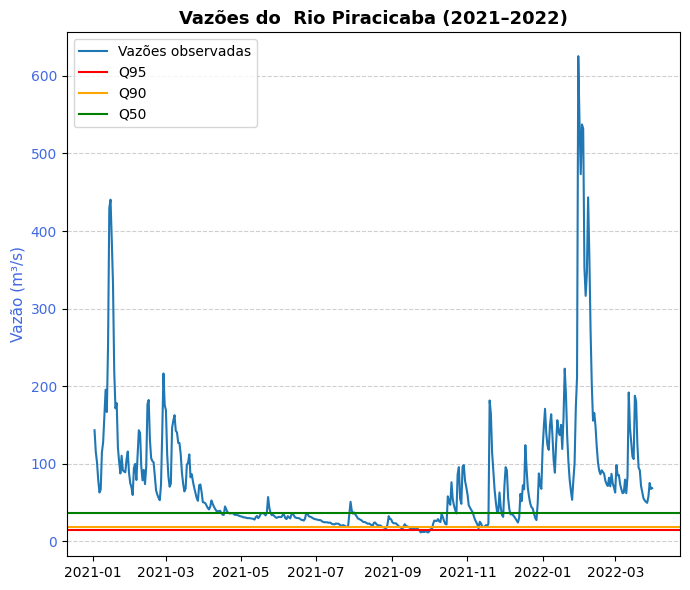

In [32]:
fig, ax1 = plt.subplots(figsize=(7,6))
vazao_novo = vazao[(vazao['Data'] > dt.datetime(2021,1,1)) & (vazao['Data'] < dt.datetime(2022,4,1))]

ax1.plot(vazao_novo['Data'], vazao_novo['Vazao'],label = "Vazões observadas")
ax1.set_ylabel("Vazão (m³/s)", color='royalblue', fontsize=11)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(axis='y', linestyle='--', alpha=0.6)

ax1.axhline(y=15, color='red', linestyle='-',label = "Q95")
ax1.axhline(y=19, color='orange', linestyle='-',label = "Q90")
ax1.axhline(y=36, color='green', linestyle='-',label = "Q50")

# --- Título e layout ---
plt.title("Vazões do  Rio Piracicaba (2021–2022)", fontsize=13, weight='bold'),
ax1.legend(loc='upper left') # Or 'best', 'lower left', etc.
plt.tight_layout()
plt.show()